In [24]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.corpus import inaugural
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation

In [2]:
df = pd.read_csv('D:\Gokul\Semester 3\DSP Project\DSPReport\captions\captions.txt')

In [8]:
df['caption'].count()

40455

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()

In [41]:
def cleanAndPreProcess(speech):
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t¦¡§':
        speech = speech.replace(char, ' ')
    speech = speech.lower()
    word_list = speech.split()
    word_list = [w for w in word_list if w not in stop_words]
    word_list = [lemmatizer.lemmatize(w) for w in word_list]
    return word_list

In [18]:
for i in df.index:
    df.loc[i,'length'] = len(df.iloc[i]['caption'].split())

In [42]:
for i in df.index:
    df.loc[i,'cleanText'] = ' '.join(cleanAndPreProcess(df.iloc[i]['caption']))

In [43]:
df.head(5)

,image,caption,length,cleanText
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,18.0,child pink dress climbing set stair entry way
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,8.0,girl going wooden building
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,9.0,little girl climbing wooden playhouse
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,10.0,little girl climbing stair playhouse
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,13.0,little girl pink dress going wooden cabin


In [20]:
df['length'].describe()

count    40455.000000
mean        11.782598
std          3.885152
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         38.000000
Name: length, dtype: float64

In [22]:
df.sort_values(by=['length'], ascending=False)

,image,caption,length
8049,2354456107_bf5c766a05.jpg,An African-American man wearing a green sweats...,38.0
2730,1499495021_d295ce577c.jpg,A dark haired woman wearing a brown jacket and...,35.0
1325,130211457_be3f6b335d.jpg,A girl in a red and black leotard with white w...,34.0
14535,2774430374_fee1d793e7.jpg,A little boy holds a bat waiting for the pitch...,34.0
15017,2815256108_fc1302117d.jpg,Two men are talking on the street ; one is poi...,34.0
...,...,...,...
23226,3237760601_5334f3f3b5.jpg,A skier,2.0
5585,2165461920_1a4144eb2b.jpg,dogs racing,2.0
9593,244760301_5809214866.jpg,People walking,2.0
9305,2428275562_4bde2bc5ea.jpg,A,1.0


In [23]:
df.iloc[8049]['caption']

'An African-American man wearing a green sweatshirt and blue vest is holding up 2 dollar bills in front of his face , while standing on a busy sidewalk in front of a group of men playing instruments .'

In [25]:
def wordCount(tweetstring):
    words = tweetstring.split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    words = [w for w in words if w not in ['amp', 'u']]
    words = [w for w in words if w.isalpha()]
    #return words

    # Get count of words
    freqdist = nltk.FreqDist(words)
    return freqdist

In [26]:
captionstring = ''
for i in df.index:
    captionstring = captionstring + ' ' + df.loc[i, 'caption']
freqdist = wordCount(captionstring)

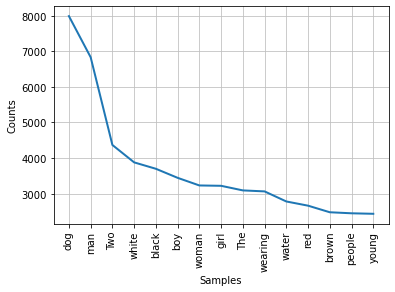

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
freqdist.plot(15)

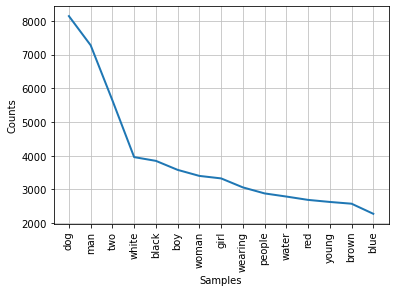

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
captionstring = ''
for i in df.index:
    captionstring = captionstring + ' ' + df.loc[i, 'cleanText']
freqdist = wordCount(captionstring)
freqdist.plot(15)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [35]:
vec = TfidfVectorizer()
vec = TfidfVectorizer(stop_words='english')
vec = TfidfVectorizer(stop_words='english', max_df = 0.9, min_df =5)
tfidf = vec.fit_transform(df['cleanText'])

In [71]:
model = LDA(n_components=3, random_state = 101)
lda_fit = model.fit(tfidf)
terms = vec.get_feature_names()
topicList = []
for i, comp in enumerate(model.components_):
    #print(f"The topic would be {id_value}")
    lis = [terms[index] for index in comp.argsort()[-10:]]
    print(lis)
    topicList.append(lis)
results = model.transform(tfidf)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['field', 'snow', 'grass', 'water', 'white', 'running', 'brown', 'dogs', 'black', 'dog']
['street', 'blue', 'young', 'red', 'men', 'boy', 'shirt', 'wearing', 'woman', 'man']
['rock', 'girls', 'bike', 'riding', 'young', 'person', 'boy', 'girl', 'people', 'man']


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

In [53]:
# Plot clusters of a subset
def plotClusters(similarity,cluster_matrix,vector_matrix):
    if(similarity == 'cosine'):
        distance = 1 - cosine_similarity(vector_matrix[0:2000]) #pass Vector Matrix here
        mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
        pos = mds.fit_transform(distance)
        xs, ys = pos[:, 0], pos[:, 1]
    elif(similarity == 'tnse'):
        tsne = TSNE(n_components=2, init='random', random_state=42, perplexity=50)
        pos = tsne.fit_transform(vector_matrix[:2000])
        xs, ys = pos[:, 0], pos[:, 1]

    clusters = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5'}
    cluster_colors = {0: '#6DA34D', 1: '#56445D', 2: '#360568', 3: '#E98A15', 4: '#12513a'}

    df_plot = pd.DataFrame(dict(x=xs, y=ys, label=cluster_matrix[0:2000])) #pass Cluster Matrix here
    groups = df_plot.groupby('label')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
                label=clusters[name], color=cluster_colors[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis= 'x',  which='both', bottom='off', top='off', labelbottom='off')
        ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')
    ax.legend(numpoints=1) 
    plt.show()

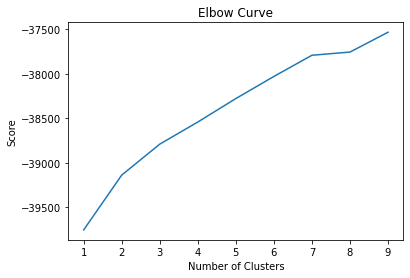

In [51]:
from sklearn.cluster import KMeans
# Plot Elbow Curve to find optimum "K" value
N = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in N]
kmeans
score = [kmeans[i].fit(tfidf).score(tfidf) for i in range(len(kmeans))]

plt.plot(N, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [55]:
from gensim.utils import simple_preprocess
import numpy as np

tokenized_list = [simple_preprocess(h) for h in df['cleanText']]
train_corpus = np.array(tokenized_list)

from gensim.models import FastText
model = FastText(train_corpus, size=100, window=5, min_count=5, workers=4,sg=1)
num_features = 100
vocab = set(model.wv.index2word)
 
def avg_vw(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="object")
    nwords = 0.
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

train_features = [avg_vw(sent_tokens, model, vocab, num_features) for sent_tokens in train_corpus]
avg_train_features = np.array(train_features)

In [57]:
def executeKmeans(no,feature_matrix):
        km = KMeans(n_clusters=no)
        km.fit(feature_matrix)
        labels = km.labels_
        km_clusters = labels.tolist()
        return km_clusters

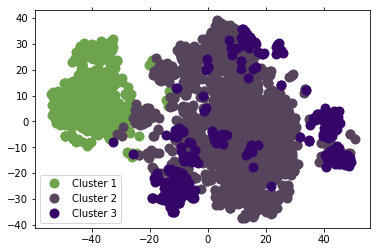

In [67]:
km_FastText_clusters = executeKmeans(3,avg_train_features)
#df['FastText_kmeans'] = km_FastText_clusters
plotClusters('tnse',km_FastText_clusters,avg_train_features)

In [65]:
km_tfidf_clusters = executeKmeans(3,tfidf)
#df['tfidfKmeans'] = km_tfidf_clusters

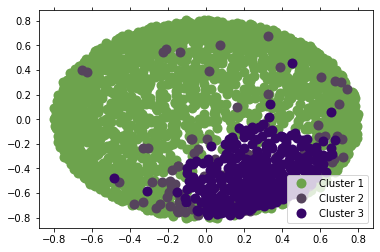

In [66]:
plotClusters('cosine',km_tfidf_clusters,tfidf)

In [68]:
import pyLDAvis

In [72]:
import pyLDAvis.sklearn
data = pyLDAvis.sklearn.prepare(model, tfidf, vec)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
pyLDAvis.display(data)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
